# The Movie Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In [117]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib  import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]
from datetime import datetime

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
df = pd.read_csv('tmdb-movies.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
df.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

In [5]:
df['cast'] = df.loc[:,'cast'].apply(str).apply(lambda x: x.replace('|', ','))
df['cast']

0        Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vi...
1        Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nic...
2        Shailene Woodley,Theo James,Kate Winslet,Ansel...
3        Harrison Ford,Mark Hamill,Carrie Fisher,Adam D...
4        Vin Diesel,Paul Walker,Jason Statham,Michelle ...
                               ...                        
10861    Michael Hynson,Robert August,Lord 'Tally Ho' B...
10862    James Garner,Eva Marie Saint,Yves Montand,Tosh...
10863    Innokentiy Smoktunovskiy,Oleg Efremov,Georgi Z...
10864    Tatsuya Mihashi,Akiko Wakabayashi,Mie Hama,Joh...
10865    Harold P. Warren,Tom Neyman,John Reynolds,Dian...
Name: cast, Length: 10866, dtype: object

In [6]:
df['keywords'] = df.loc[:,'keywords'].apply(str).apply(lambda x: x.replace('|', ','))
df['keywords']

0        monster,dna,tyrannosaurus rex,velociraptor,island
1         future,chase,post-apocalyptic,dystopia,australia
2        based on novel,revolution,dystopia,sequel,dyst...
3                    android,spaceship,jedi,space opera,3d
4                      car race,speed,revenge,suspense,car
                               ...                        
10861                             surfer,surfboard,surfing
10862                            car race,racing,formula 1
10863                             car,trolley,stealing car
10864                                                spoof
10865                  fire,gun,drive,sacrifice,flashlight
Name: keywords, Length: 10866, dtype: object

In [7]:
df['genres'] = df.loc[:,'genres'].apply(str).apply(lambda x: x.replace('|', ','))
df['genres']

0        Action,Adventure,Science Fiction,Thriller
1        Action,Adventure,Science Fiction,Thriller
2               Adventure,Science Fiction,Thriller
3         Action,Adventure,Science Fiction,Fantasy
4                            Action,Crime,Thriller
                           ...                    
10861                                  Documentary
10862                       Action,Adventure,Drama
10863                               Mystery,Comedy
10864                                Action,Comedy
10865                                       Horror
Name: genres, Length: 10866, dtype: object

In [8]:
df['production_companies'] = df.loc[:,'production_companies'].apply(str).apply(lambda x: x.replace('|', ','))
df['production_companies']

0        Universal Studios,Amblin Entertainment,Legenda...
1        Village Roadshow Pictures,Kennedy Miller Produ...
2        Summit Entertainment,Mandeville Films,Red Wago...
3                Lucasfilm,Truenorth Productions,Bad Robot
4        Universal Pictures,Original Film,Media Rights ...
                               ...                        
10861                                    Bruce Brown Films
10862    Cherokee Productions,Joel Productions,Douglas ...
10863                                              Mosfilm
10864                              Benedict Pictures Corp.
10865                                            Norm-Iris
Name: production_companies, Length: 10866, dtype: object

In [9]:
def get_date(x):
    date_list = x['release_date'].split('/')
    month = date_list[0]
    day = date_list[1]  
    year = x['release_year']
    return pd.to_datetime(str(year)+'/'+month+'/'+day, format='%Y/%m/%d')

In [10]:
if type(df['release_date'][0]) == str:
    df['release_date'] = df.loc[:,['release_date', 'release_year']]\
    .apply(get_date, axis=1)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10866 non-null  int64         
 1   imdb_id               10856 non-null  object        
 2   popularity            10866 non-null  float64       
 3   budget                10866 non-null  int64         
 4   revenue               10866 non-null  int64         
 5   original_title        10866 non-null  object        
 6   cast                  10866 non-null  object        
 7   homepage              2936 non-null   object        
 8   director              10822 non-null  object        
 9   tagline               8042 non-null   object        
 10  keywords              10866 non-null  object        
 11  overview              10862 non-null  object        
 12  runtime               10866 non-null  int64         
 13  genres          

In [12]:
if 'release_year' in df:
    df.drop('release_year', inplace=True, axis=1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10866 non-null  int64         
 1   imdb_id               10856 non-null  object        
 2   popularity            10866 non-null  float64       
 3   budget                10866 non-null  int64         
 4   revenue               10866 non-null  int64         
 5   original_title        10866 non-null  object        
 6   cast                  10866 non-null  object        
 7   homepage              2936 non-null   object        
 8   director              10822 non-null  object        
 9   tagline               8042 non-null   object        
 10  keywords              10866 non-null  object        
 11  overview              10862 non-null  object        
 12  runtime               10866 non-null  int64         
 13  genres          

<a id='eda'></a>
## Exploratory Data Analysis

In [14]:
df['popularity'].describe()

count    10866.000000
mean         0.646441
std          1.000185
min          0.000065
25%          0.207583
50%          0.383856
75%          0.713817
max         32.985763
Name: popularity, dtype: float64

### Research Question 1 (What is the most popular 5 movies ?)

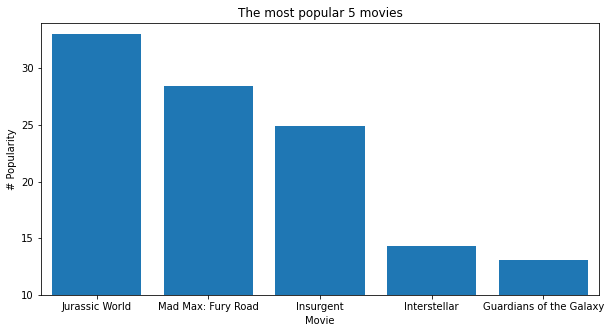

In [154]:
pop = list(df['popularity'].sort_values(ascending=False).head(5))
movies = df[df['popularity'].isin(pop)]['original_title'].values
plt.bar(movies, pop)
plt.axis([-0.5, 4.5, 10, 34])
plt.xticks([i  for i in movies], movies)
plt.xlabel('Movie')
plt.ylabel('# Popularity')
plt.title('The most popular 5 movies')
plt.savefig('popular_5_movies_at_all');

### Research Question 2  (What is runtime duration of The most popular 5 movies?)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10866 non-null  int64         
 1   imdb_id               10856 non-null  object        
 2   popularity            10866 non-null  float64       
 3   budget                10866 non-null  int64         
 4   revenue               10866 non-null  int64         
 5   original_title        10866 non-null  object        
 6   cast                  10866 non-null  object        
 7   homepage              2936 non-null   object        
 8   director              10822 non-null  object        
 9   tagline               8042 non-null   object        
 10  keywords              10866 non-null  object        
 11  overview              10862 non-null  object        
 12  runtime               10866 non-null  int64         
 13  genres          

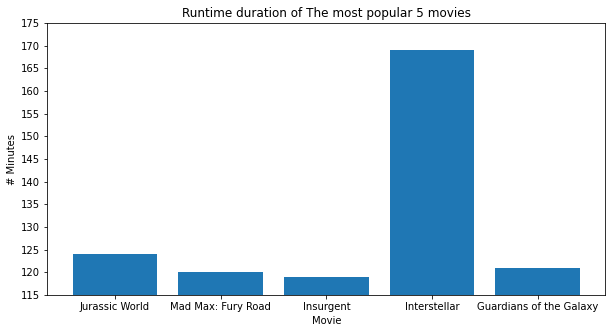

In [18]:
runtime = df[df['original_title'].isin(movies)]['runtime']
plt.bar(movies, runtime)
x1,x2,y1,y2 = plt.axis()
plt.axis([x1,x2, 115, 175])
plt.yticks(range(115, 176, 5))
plt.ylabel('# Minutes')
plt.xlabel('Movie')
plt.title('Runtime duration of The most popular 5 movies')
plt.savefig('runtime');

### Research Question 3  (What is vote count of The most popular 5 movies ?)

['Jurassic World' 'Mad Max: Fury Road' 'Insurgent' 'Interstellar'
 'Guardians of the Galaxy']
0      5562
1      6185
2      2480
629    6498
630    5612
Name: vote_count, dtype: int64


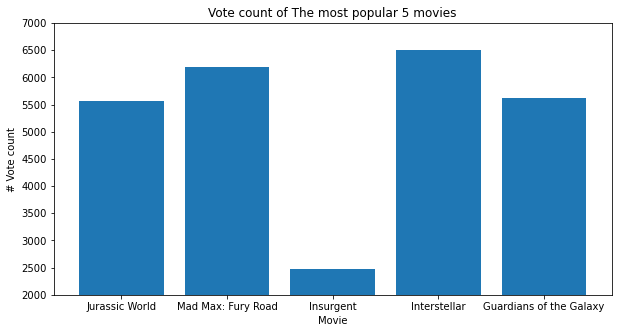

In [155]:
vote_count = df[df['original_title'].isin(movies)]['vote_count']
plt.bar(movies, vote_count);
x1,x2,y1,y2 = plt.axis()
plt.axis([x1,x2, 2000, 7000])
plt.yticks(range(2000, 7500, 500));
plt.ylabel('# Vote count')
plt.xlabel('Movie')
plt.title('Vote count of The most popular 5 movies')
plt.savefig('vote');
print(movies)
print(vote_count)

### Research Question 4  (What is popularity of the most popular movies in every 5 years ?)

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10866 non-null  int64         
 1   imdb_id               10856 non-null  object        
 2   popularity            10866 non-null  float64       
 3   budget                10866 non-null  int64         
 4   revenue               10866 non-null  int64         
 5   original_title        10866 non-null  object        
 6   cast                  10866 non-null  object        
 7   homepage              2936 non-null   object        
 8   director              10822 non-null  object        
 9   tagline               8042 non-null   object        
 10  keywords              10866 non-null  object        
 11  overview              10862 non-null  object        
 12  runtime               10866 non-null  int64         
 13  genres          

In [160]:
df['release_date'].describe()

count                   10866
unique                   5909
top       2009-01-01 00:00:00
freq                       28
first     1960-01-01 00:00:00
last      2015-12-31 00:00:00
Name: release_date, dtype: object

In [161]:
df[df['release_date'] == '2009-01-01 00:00:00']['release_date'].count()

28

In [162]:
year = set(pd.DatetimeIndex(df['release_date']).year)
len(year) # 1960 -> 2015

56

In [163]:
pentagonal_years = list()
for i in range(1960, 2016, 5):
    pentagonal_years.append(i)
len(pentagonal_years)
intervals = pentagonal_years.copy()
# [1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015]

In [164]:
movies = list()
while len(pentagonal_years):
    i = pentagonal_years.pop(0)
    df_pent = df[pd.DatetimeIndex(df['release_date']).year.isin(range(i,i+6))]
    
    pop = list(df_pent['popularity'].sort_values(ascending=False).head(1))
    movie = df_pent[df_pent['popularity'].isin(pop)]['original_title'].values
    movies.append(movie[0])
    pentagonal_years.pop(0)
movies

['Dr. No',
 'The Godfather',
 'Back to the Future',
 'Pulp Fiction',
 'The Lord of the Rings: The Fellowship of the Ring',
 'Jurassic World']

In [165]:
pd.Series.reverse = lambda self : self[::-1]

In [166]:
pop = df[df['original_title'].isin(movies)]['popularity'].reverse().values
pop

array([ 3.170651,  5.738034,  6.095293,  8.093754,  8.575419, 32.985763])

In [167]:
movies
if len(intervals):
    concat_years_movies = list()
    for movie in movies:
        start = str(intervals.pop(0))
        end = str(intervals.pop(0))
#         concat_years_movies.append(start+" "+movie+" "+end)
        concat_years_movies.append(start+" "+movie[:21]+" "+end)
    
concat_years_movies
# pentagonal_years

['1960 Dr. No 1965',
 '1970 The Godfather 1975',
 '1980 Back to the Future 1985',
 '1990 Pulp Fiction 1995',
 '2000 The Lord of the Rings 2005',
 '2010 Jurassic World 2015']

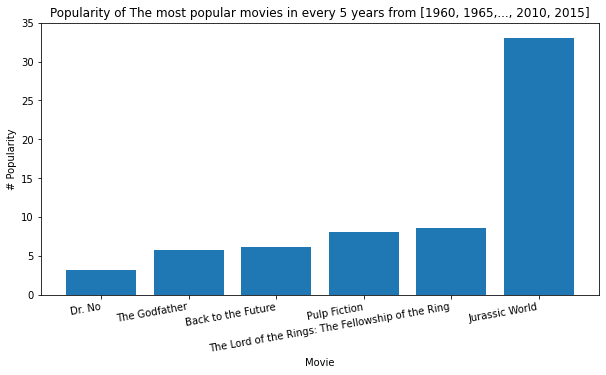

In [169]:
ax = plt.bar(movies, pop)
x1,x2,y1,y2 = plt.axis()
plt.axis([x1,x2, 0, 35])
plt.xticks(movies,rotation=10,ha='right')
plt.ylabel('# Popularity')
plt.xlabel('Movie')
plt.title('Popularity of The most popular movies in every 5 years from [1960, 1965,..., 2010, 2015]');
plt.savefig('popular movie in every 5 years')

<a id='conclusions'></a>
## Conclusions
See report.pdf for final report result